In [1]:
from features import ensembleFeature
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import torch
from torch import nn
import re
from sklearn.utils import shuffle
from utils import metricsCal
from torch.utils.data import DataLoader,TensorDataset
import math
import sys
import copy
import pickle
from torch.autograd import Variable
from sklearn.model_selection import KFold
import torch.nn.functional as F
import os
import Model
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import csv
%matplotlib inline

In [2]:
files = os.listdir("out/")

In [3]:
Auc_list = []
for file in files:
    if "Auc" in file:
        if "SVM" not in file:
            Auc_list.append(file)

In [4]:
Auc_list

['Auc_emb.csv',
 'Auc_EIIP.csv',
 'Auc_PseDNC.csv',
 'Auc_NCPA.csv',
 'Auc_PCP.csv',
 'Auc_binary.csv',
 'Auc_ENAC.csv',
 'Auc_PSNP.csv',
 'Auc_gene.csv',
 'Auc_DBPF.csv']

In [5]:
filedir = "out/"
Auc_data_list = []
for file in Auc_list:
    if "gene" not in file:
        Auc_data_list.append(pd.read_csv(filedir+file,index_col=0))

In [15]:
Auc_all

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,51
0,,,,,,,,,,,,,,,,,,,,,
FullTranscript_A549_emb_Self-Attention+BiLSTM_KFold_0,0.780504,0.717860,0.774402,0.796964,0.802608,0.799420,0.805399,0.799873,0.802856,0.811868,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.804105
FullTranscript_A549_emb_Self-Attention+BiLSTM_KFold_1,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
FullTranscript_A549_emb_Self-Attention+BiLSTM_KFold_2,0.761291,0.744965,0.782036,0.766027,0.789436,0.799457,0.804671,0.807738,0.812358,0.822779,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.812956
FullTranscript_A549_emb_Self-Attention+BiLSTM_KFold_3,0.500224,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500029
FullTranscript_A549_emb_Self-Attention+BiLSTM_KFold_4,0.783619,0.780689,0.789776,0.798598,0.814581,0.814587,0.823886,0.820262,0.825177,0.825759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.809685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
matureRNA_MOLM13_DBPF_BILSTM_KFold_0,0.748473,0.762118,0.760284,0.766166,0.765095,0.766202,0.772179,0.775264,0.771785,0.776963,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.704745
matureRNA_MOLM13_DBPF_BILSTM_KFold_1,0.745441,0.748833,0.752424,0.754870,0.760915,0.759098,0.764821,0.767902,0.769425,0.771221,...,0.780388,0.781900,0.783555,0.784978,0.784037,0.784720,0.784931,0.785253,0.000000,0.701271
matureRNA_MOLM13_DBPF_BILSTM_KFold_2,0.753721,0.763537,0.767237,0.767701,0.772474,0.773538,0.775328,0.773549,0.771302,0.771514,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693686


In [14]:
#10个180行的全拼
Auc_all = Auc_data_list[0]
for i in range(len(Auc_list)-2):
    Auc_all = pd.concat([Auc_all,Auc_data_list[i+1]])

In [225]:
#Feature = ["emb","EIIP","PseDNC","NCPA","PCP","ENAC","binary","PSNP","gene","DBPF"]
Feature = ["emb","EIIP","PseDNC","NCPA","PCP","ENAC","binary","PSNP","DBPF"]
cell_type = ["A549","CD8T","Hek293_abacm","Hek293_sysy","HeLa","MOLM13"]
RNA_type = ["FullTranscript","matureRNA"]
net_type = ["Self-Attention+BiLSTM","BILSTM+Self-Attention","BILSTM"]

In [243]:
def get_Ind_score(data,lei="FullTranscript"):
    result = np.zeros(len(cell_type)*len(net_type)).reshape(len(cell_type),len(net_type))
    if lei == "FullTranscript":
        data = data.iloc[0:90,:]
    elif lei == "matureRNA":
        data = data.iloc[90:180,:]
    for i in range(len(cell_type)):
        for j in range(len(net_type)):
            row = i*15+j*5
            x = np.max(np.array(data.iloc[row:row+5,-1]))
            result[i][j] = x
#             x = np.array(data.iloc[row:row+5,-1])
#             num = 0
#             sum_ = 0
#             for k in x:
#                 if k>0.51:
#                     num+=1
#                     sum_+=k
#             avg = sum_/num
#             result[i][j] = avg
    return result
def get_Cross_score(data,lei="FullTranscript"):
    result = np.zeros(len(cell_type)*len(net_type)).reshape(len(cell_type),len(net_type))
    if lei == "FullTranscript":
        data = data.iloc[0:90,:]
    elif lei == "matureRNA":
        data = data.iloc[90:180,:]
    for i in range(len(cell_type)):
        for j in range(len(net_type)):
            row = i*15+j*5
            x = np.max(np.array(data.iloc[row:row+5,0:-1]),axis=1)
            num = 0
            sum_ = 0
            for k in x:
                if k>0.51:
                    num+=1
                    sum_+=k
            avg = sum_/num
            result[i][j] = avg
    return result

In [185]:
#获取不同特征的数据、独立测试的
#Feature = ["emb","EIIP","PseDNC","NCPA","PCP","ENAC","binary","PSNP","gene","DBPF"]
fea_full = []
fea_mature = []
for i in range(len(Feature)):
    fea_full.append(np.mean(np.max(get_Ind_score(Auc_data_list[i],lei="FullTranscript"),axis=1)))
for i in range(len(Feature)):
    fea_mature.append(np.mean(np.max(get_Ind_score(Auc_data_list[i],lei="matureRNA"),axis=1)))

In [93]:
#获取不同特征的数据、交叉验证的
Feature = ["emb","EIIP","PseDNC","NCPA","PCP","ENAC","binary","PSNP","gene","DBPF"]
fea_full_cross = []
fea_mature_cross = []
for i in range(len(Feature)):
    fea_full_cross.append(np.mean(np.max(get_Cross_score(Auc_data_list[i],lei="FullTranscript"),axis=1)))
for i in range(len(Feature)):
    fea_mature_cross.append(np.mean(np.max(get_Cross_score(Auc_data_list[i],lei="matureRNA"),axis=1)))

In [186]:
#获取不同网络结构的数据、独立测试的
net_type = ["Self-Attention+BiLSTM","BILSTM+Self-Attention","BILSTM"]
Feature = ["emb","EIIP","PseDNC","NCPA","PCP","ENAC","binary","PSNP","gene","DBPF"]
fea_full_net = []
fea_mature_net = []
for i in range(len(Feature)):
    fea_full_net.append(np.mean(get_Ind_score(Auc_data_list[i],lei="FullTranscript"),axis=0))
for i in range(len(Feature)):
    fea_mature_net.append(np.mean(get_Ind_score(Auc_data_list[i],lei="matureRNA"),axis=0))
    
fea_full_net_cross = []
fea_mature_net_cross = []
for i in range(len(Feature)):
    fea_full_net_cross.append(np.mean(get_Cross_score(Auc_data_list[i],lei="FullTranscript"),axis=0))
for i in range(len(Feature)):
    fea_mature_net_cross.append(np.mean(get_Cross_score(Auc_data_list[i],lei="matureRNA"),axis=0))

In [193]:
np.array(fea_mature_net).transpose()

array([[0.7384296 , 0.666836  , 0.60122892, 0.73711679, 0.68365315,
        0.7354851 , 0.73554214, 0.73742559, 0.99751587, 0.73664117],
       [0.74618843, 0.66999631, 0.60597871, 0.73963639, 0.68647034,
        0.73531707, 0.74163047, 0.73868289, 0.99910779, 0.74011017],
       [0.74513795, 0.67003306, 0.60233149, 0.74029554, 0.68830622,
        0.73639035, 0.73500879, 0.7385597 , 0.99913585, 0.73840446]])

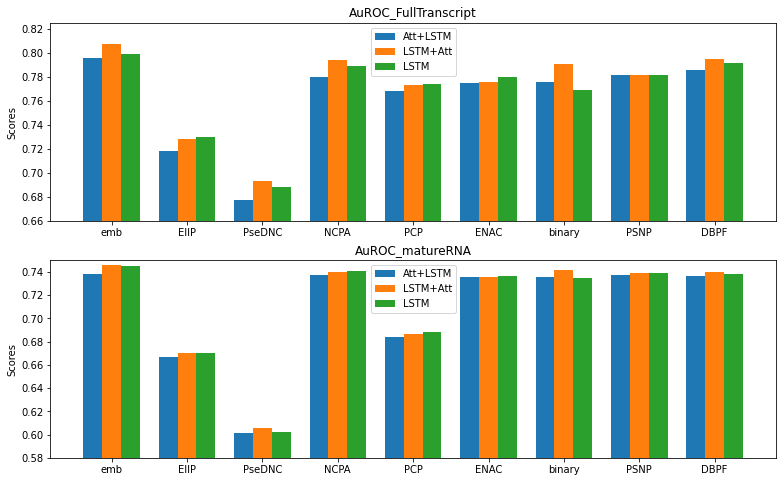

In [247]:
#网络结构对比图
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(13, 8))
# 构造x轴刻度标签、数据
labels = ["emb","EIIP","PseDNC","NCPA","PCP","ENAC","binary","PSNP","DBPF"]
#FullTranscript
first = [0.79591519, 0.71804605, 0.67708166, 0.78000546, 0.76788851,
        0.77523155, 0.77542054, 0.78127204, 0.78550624]
second = [0.807644  , 0.72800311, 0.69304278, 0.79443093, 0.77335802,
        0.77586999, 0.7906932 , 0.78191351, 0.79450228]
third = [0.79890421, 0.72984061, 0.68795717, 0.78890595, 0.77424339,
        0.78010275, 0.76911951, 0.78183496, 0.79193127]


plt.subplot(211)
plt.ylim(0.66,0.825)
x = np.arange(len(labels))  # x轴刻度标签位置
width = 0.25  # 柱子的宽度
# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
# x - width，x， x + width即每组数据在x轴上的位置
plt.bar(x - width, first, width, label='Att+LSTM')
plt.bar(x, second, width, label='LSTM+Att')
plt.bar(x + width, third, width, label='LSTM')
plt.ylabel('Scores')
plt.title('AuROC_FullTranscript')

# x轴刻度标签位置不进行计算
plt.xticks(x, labels=labels)
plt.legend()

#matureRNA
first = [0.72376071, 0.66248131, 0.58708746, 0.73393414, 0.67611722,
        0.73179757, 0.73218289, 0.73557767, 0.73167067]
second = [0.74055243, 0.6660658 , 0.60027696, 0.73560962, 0.67863734,
        0.7323515 , 0.73521193, 0.73643665, 0.73603754]
third = [0.739705  , 0.66794348, 0.59830526, 0.73632852, 0.68045193,
        0.73179176, 0.73101304, 0.73613517, 0.73361735]

first = [0.7384296 , 0.666836  , 0.60122892, 0.73711679, 0.68365315,
        0.7354851 , 0.73554214, 0.73742559, 0.73664117]
second=[0.74618843, 0.66999631, 0.60597871, 0.73963639, 0.68647034,
        0.73531707, 0.74163047, 0.73868289,0.74011017]
third = [0.74513795, 0.67003306, 0.60233149, 0.74029554, 0.68830622,
        0.73639035, 0.73500879, 0.7385597 , 0.73840446]


# 三组数据
plt.subplot(212)
plt.ylim(0.58,0.75)
x = np.arange(len(labels))  # x轴刻度标签位置
width = 0.25  # 柱子的宽度
# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
# x - width，x， x + width即每组数据在x轴上的位置
plt.bar(x - width, first, width, label='Att+LSTM')
plt.bar(x, second, width, label='LSTM+Att')
plt.bar(x + width, third, width, label='LSTM')
plt.ylabel('Scores')
plt.title('AuROC_matureRNA')

# x轴刻度标签位置不进行计算
plt.xticks(x, labels=labels)
plt.legend()

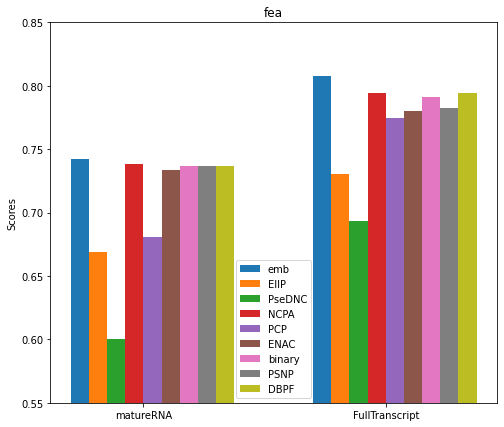

In [167]:
#特征对比图
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 7))
# 构造x轴刻度标签、数据
labels = ["matureRNA","FullTranscript"]
features = ["emb","EIIP","PseDNC","NCPA","PCP","ENAC","binary","PSNP","DBPF"]
#制作特征图
fea_pic = []
for i in range(len(fea_full)):
    fea_one = []
    if i != 8:
        fea_one.append(fea_mature[i])
        fea_one.append(fea_full[i])
        fea_pic.append(fea_one)


# 三组数据
# plt.subplot(132)
plt.ylim(0.55,0.85)
x = np.array([0,2])  #np.arange(len(labels))  # x轴刻度标签位置
width = 0.15  # 柱子的宽度
plt.ylabel('Scores')
plt.title('fea')
plt.xticks(x+width*3.5, labels=labels)
for i in range(len(fea_pic)):
    plt.bar(x+i*width
            ,fea_pic[i]
            , width,
            label=features[i])

plt.legend()

In [ ]:
#这是注意力吧
[0.52656029, 0.75013984, 1.03838469, 0.60915329, 0.53828748,
       0.41765049, 0.48938531, 1.01153378, 0.93839417, 0.61464125,
       1.17985888, 0.75053694, 0.48863859, 0.40123876, 0.54429479,
       1.02072241, 0.72494532, 0.99771934, 1.0970502 , 0.85894414,
       1.28700402, 1.48348014, 1.58559101, 1.65393916, 1.526437  ,
       1.71948794, 1.77903766, 1.69470435, 1.45045068, 1.22248871,
       0.94471735, 0.62609143, 0.56688987, 0.97286475, 1.07808051,
       1.39984258, 1.4935536 , 0.93186551, 0.59101351, 0.82227935,
       1.17210037]

In [215]:
get_Ind_score(Auc_data_list[9],lei="FullTranscript").transpose()

array([[0.80405811, 0.7969899 , 0.78885124, 0.83877928, 0.75155008,
        0.76516185],
       [0.81407906, 0.8045998 , 0.79183898, 0.84266838, 0.75882678,
        0.77343627],
       [0.81484191, 0.80262766, 0.78880367, 0.84673222, 0.75671222,
        0.77610427]])

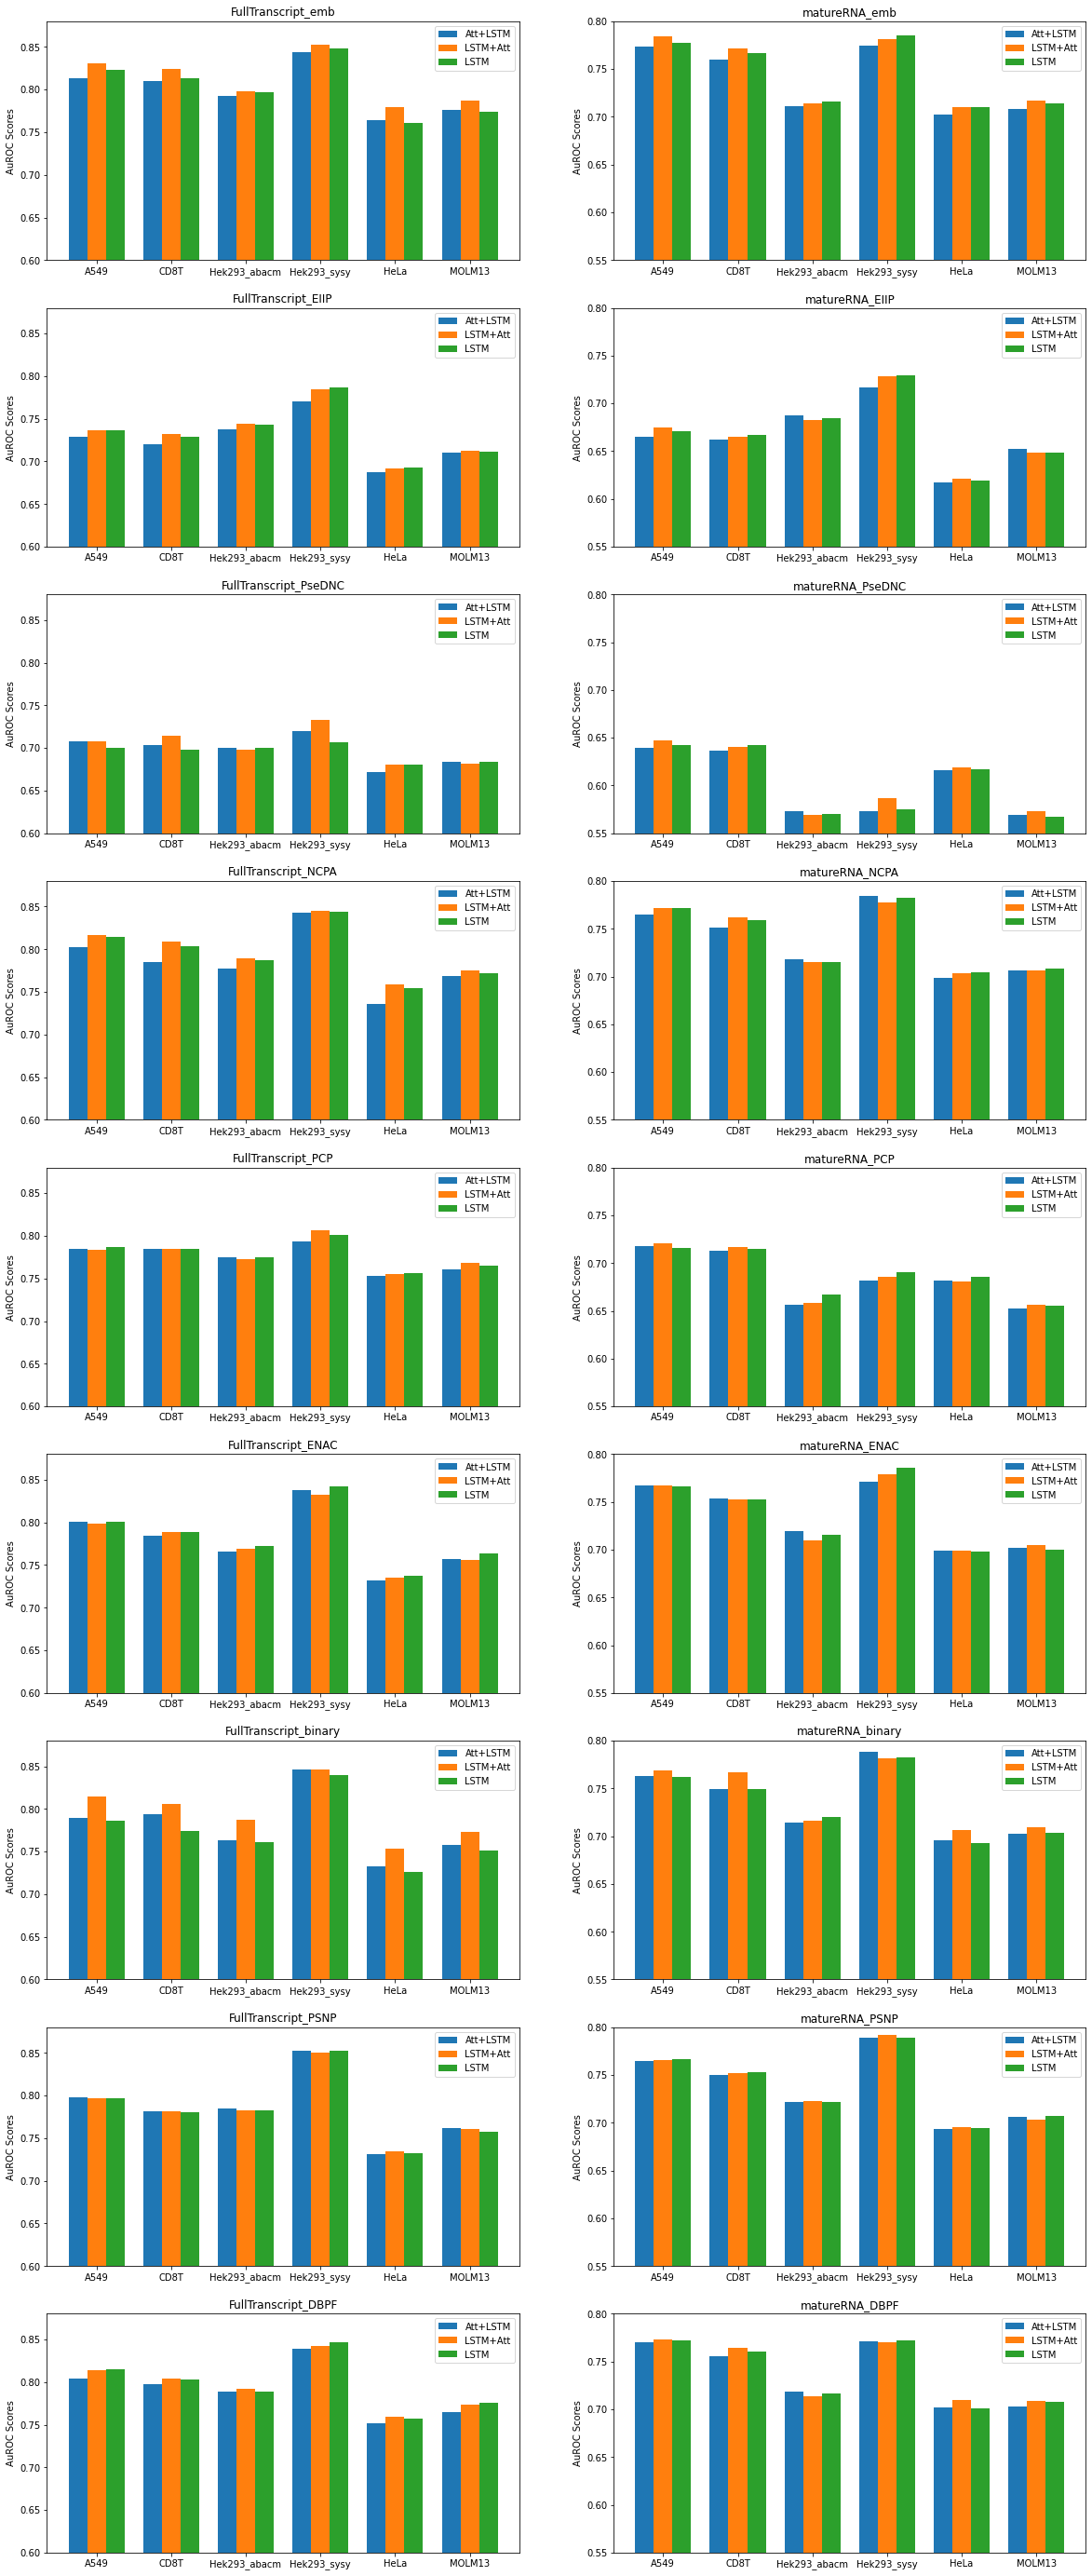

In [245]:
#网络结构对比图
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 50))
# 构造x轴刻度标签、数据
labels = ["A549","CD8T","Hek293_abacm","Hek293_sysy","HeLa","MOLM13"]

for i in range(len(Feature)):
    #FullTranscript+Binary
    first = get_Ind_score(Auc_data_list[i],lei="FullTranscript").transpose()[0]
    second = get_Ind_score(Auc_data_list[i],lei="FullTranscript").transpose()[1]
    third =get_Ind_score(Auc_data_list[i],lei="FullTranscript").transpose()[2]
    plt.subplot(9,2,2*i+1)
    plt.ylim(0.60,0.88)
    x = np.arange(len(labels))  # x轴刻度标签位置
    width = 0.25  # 柱子的宽度
    # 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
    # x - width，x， x + width即每组数据在x轴上的位置
    plt.bar(x - width, first, width, label='Att+LSTM')
    plt.bar(x, second, width, label='LSTM+Att')
    plt.bar(x + width, third, width, label='LSTM')
    plt.ylabel('AuROC Scores')
    plt.title('FullTranscript_'+Feature[i])
    # x轴刻度标签位置不进行计算
    plt.xticks(x, labels=labels)
    plt.legend()

    #matureRNA+Binary
    first = get_Ind_score(Auc_data_list[i],lei="matureRNA").transpose()[0]
    second = get_Ind_score(Auc_data_list[i],lei="matureRNA").transpose()[1]
    third =get_Ind_score(Auc_data_list[i],lei="matureRNA").transpose()[2]

    plt.subplot(9,2,2*i+2)
    plt.ylim(0.55,0.80)
    x = np.arange(len(labels))  # x轴刻度标签位置
    width = 0.25  # 柱子的宽度
    # 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
    # x - width，x， x + width即每组数据在x轴上的位置
    plt.bar(x - width, first, width, label='Att+LSTM')
    plt.bar(x, second, width, label='LSTM+Att')
    plt.bar(x + width, third, width, label='LSTM')
    plt.ylabel('AuROC Scores')
    plt.title('matureRNA_'+Feature[i])

    # x轴刻度标签位置不进行计算
    plt.xticks(x, labels=labels)
    plt.legend()
# plt.savefig('test.jpg', bbox_inches= 'tight')